In [1]:

from progressbar import ProgressBar
pbar = ProgressBar()

In [2]:
from english_words import english_words_lower_set

In [3]:
a=english_words_lower_set
Bank=[]
for i in range(len(list(a))):
    word= list(a)[i]
    if len(word)==5:
        Bank.append(word)
len(Bank)

3210

In [4]:
import string
alphabet_string = string.ascii_lowercase
alphabet_list = list(alphabet_string)
import pandas as pd
  
# initialize data of lists.
data = {'count':[0] * 26}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=alphabet_list)


Weighted Approach

In [5]:

for i in range(len(Bank)):
    for k in range(len(alphabet_list)):
        if Bank[i].find(alphabet_list[k])!=-1:
            df.iloc[k]+=1
df

,count
a,1396
b,398
c,616
d,491
e,1431
f,241
g,391
h,523
i,908
j,58


In [6]:
data1 = {'weight':[0]*len(Bank)}
  
# Creates pandas DataFrame.
dffweight = pd.DataFrame(data1, index=Bank)
for i in range(len(Bank)):
        for k in range(len(alphabet_list)):
            if Bank[i].find(alphabet_list[k])!=-1:
                dffweight.iloc[i]+=df.iloc[k][0]
dffweight

,weight
taste,4574
fermi,4091
amigo,4082
gulch,3031
skirt,4011
...,...
pupae,3864
servo,4517
gruff,2304
croix,3607


In [7]:
dffweight['weight'].idxmax()

'arose'

In [8]:
dffweight['weight'].max()

5724

Minimizing unselected approach

In [9]:
data1 = {'weight':[0]*len(Bank)}
  
# Creates pandas DataFrame.
dffweight1 = pd.DataFrame(data1, index=Bank)
for i in range(len(Bank)):
    temp=list(Bank[i])
    Bank1=Bank
    for k in range(5):
        iterator = filter(lambda x: x.find(temp[k])==-1, Bank1)
        Bank1=list(iterator)
    dffweight1.iloc[i]=len(Bank1)
dffweight1

,weight
taste,425
fermi,572
amigo,456
gulch,1032
skirt,650
...,...
pupae,477
servo,474
gruff,1403
croix,745


In [10]:
dffweight1['weight'].idxmin()

'aries'

In [11]:
dffweight1['weight'].min()

207

In [12]:
dffweight1.loc['arose',]

weight    214
Name: arose, dtype: int64

Entropy Approach

In [13]:
import collections
def compare(guess, true):
    letter_info=collections.Counter(true)
    A=""
    string=A.zfill(5)
    for i in range(5):
        if guess[i]==true[i]:
            new = list(string)
            new[i] = 'G'
            string=''.join(new)
            letter_info[guess[i]]-=1
    for i in range(5):
        if true.find(guess[i])!=-1 and string[i]!='G'and letter_info[guess[i]]!=0:
            new = list(string)
            new[i] = 'Y'
            string=''.join(new)
            letter_info[guess[i]]-=1
    return(string)
        
        

In [14]:
compare('apple', 'happy')

'YYG00'

In [15]:
import math
def entropy(word, X):
    entropy = {'Entropy':[0]*len(X)}
    dfentropy = pd.DataFrame(entropy, index=X)
    for i in range(len(X)):
        dfentropy.iloc[i]=compare(word, X[i])
    occurance=dfentropy['Entropy'].value_counts()
    Entropy=0
    for i in range(len(occurance)):
        Entropy+=(occurance[i]/len(X))*math.log(len(X)/occurance[i],2)
    return(Entropy)
        

In [16]:
entropy('arose', Bank)

5.823276171902227

In [17]:

dffentropy = pd.DataFrame(data1, index=Bank)

for i in range(len(Bank)):
    dffentropy.iloc[i]=entropy(Bank[i], Bank)
dffentropy

,weight
taste,5.045030
fermi,4.544779
amigo,4.500944
gulch,4.139811
skirt,4.856277
...,...
pupae,4.267272
servo,4.938831
gruff,3.171073
croix,4.404978


In [18]:
dffentropy['weight'].idxmax()

'slate'

In [19]:
dffentropy['weight'].max()

5.904919885590502

In [20]:
dffweight.loc['slate',]

weight    5474
Name: slate, dtype: int64

Play Wordle

In [21]:
def play_wordle(guess, true, Bank, Y=False): #Bank1 is the possible output, Bank2 is the possible guess
    k=1
    Bank1=Bank
    Bank2=Bank
    while guess != true:
        k+=1
        a=compare(guess, true)
        if guess in Bank1:
            Bank1.remove(guess)
        for i in range(5):
            if a[i]=='G':
                iterator = filter(lambda x: x[i]==guess[i], Bank1)
                Bank1=list(iterator)
            elif a[i]=='Y':
                iterator = filter(lambda x: x[i]!=guess[i], Bank1)
                Bank1=list(iterator)
                iterator = filter(lambda x: x.find(guess[i])!=-1, Bank1)
                Bank1=list(iterator)
            else:
                letter_info=collections.Counter(guess)
                if letter_info[guess[i]]==1: #interesting bug#1 fixed
                    iterator = filter(lambda x: x.find(guess[i])==-1, Bank1)
                    Bank1=list(iterator)
        if guess in Bank2:#interesting Bug #2, fixed
            Bank2.remove(guess)
        for i in range(5):
            if true.find(guess[i])==-1:
                iterator = filter(lambda x: x.find(guess[i])==-1, Bank2)
                Bank2=list(iterator)
        data1 = {'weight':[0]*len(Bank2)}
        dffentropy = pd.DataFrame(data1, index=Bank2)
        for i in range(len(Bank2)):
            dffentropy.iloc[i]=entropy(Bank2[i], Bank2)
        if len(Bank1)<=2:
            guess=Bank1[0]
        else:
            guess=dffentropy['weight'].idxmax()
        if Y==True:
            print(guess)
    return(k)
        
        

In [22]:
play_wordle('slate', 'brest', Bank, Y=True)

siren
store
terse
ceres
brest


6

In [23]:
# TO play wordle
import random
AnswerBank=random.sample(Bank, 300)
AnswerBank
    

['april',
 'vitro',
 'filmy',
 'beman',
 'quart',
 'mouth',
 'lycee',
 'stern',
 'scops',
 'crate',
 'hines',
 'graze',
 'bract',
 'peepy',
 'degum',
 'haifa',
 'stuck',
 'prima',
 'satan',
 'brain',
 'swede',
 'quirk',
 'rosen',
 'wrath',
 'assam',
 'byrne',
 'franz',
 'parry',
 'dakar',
 'dozen',
 'moist',
 'cross',
 'troll',
 'motel',
 'facet',
 'habit',
 'louse',
 'attic',
 'raise',
 'evans',
 'phage',
 'enemy',
 'blitz',
 'sword',
 'husky',
 'awful',
 'sound',
 'begun',
 'beset',
 'defer',
 'straw',
 'legal',
 'riggs',
 'boone',
 'flood',
 'trail',
 'viper',
 "can't",
 'trout',
 'bough',
 'tract',
 'bruit',
 'bible',
 'scalp',
 'bleat',
 'apply',
 'woman',
 'elbow',
 'wally',
 'merry',
 'kruse',
 'folio',
 'tidal',
 'swing',
 'axiom',
 'glass',
 'drawl',
 'waldo',
 'gnash',
 'arson',
 'feces',
 'audit',
 'huron',
 'alvin',
 'paulo',
 'muong',
 'gizmo',
 'alter',
 'frail',
 'toast',
 'leigh',
 'stake',
 'large',
 'nitty',
 'velar',
 'lapel',
 'stale',
 'organ',
 'adept',
 'glove',


Slate

In [24]:
tries=0
Graph=[]
for i in pbar(range(300)):
    t=play_wordle('slate', AnswerBank[i], Bank)
    tries+=t
    Graph.append(t)
    
tries=tries/300
print(tries)

4.296666666666667


Arose

In [25]:
pbar = ProgressBar()
tries1=0
Graph1=[]
for i in pbar(range(300)):
    t1=play_wordle('arose', AnswerBank[i], Bank)
    tries1+=t1
    Graph1.append(t1)
tries1=tries1/300
print(tries1)
 

4.3133333333333335


Raise

In [26]:
pbar = ProgressBar()
tries2=0
Graph2=[]
for i in pbar(range(300)):
    t2=play_wordle('raise', AnswerBank[i], Bank)
    tries2+=t2
    Graph2.append(t2)
tries2=tries2/300
print(tries2)

4.3533333333333335


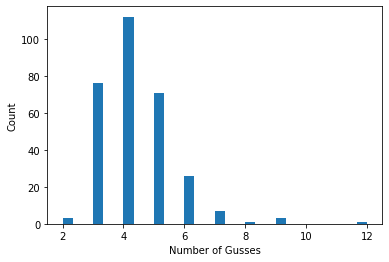

In [27]:
import matplotlib.pyplot as plt
plt.hist(Graph,bins=30)
plt.ylabel('Count')
plt.xlabel('Number of Gusses');

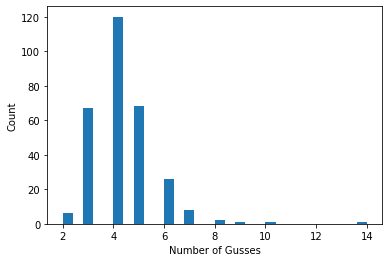

In [28]:
import matplotlib.pyplot as plt
plt.hist(Graph1,bins=30)
plt.ylabel('Count')
plt.xlabel('Number of Gusses');

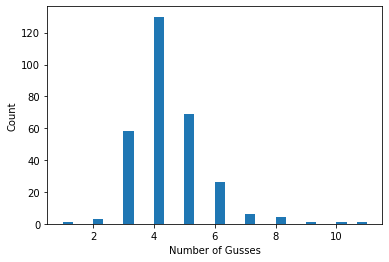

In [29]:
import matplotlib.pyplot as plt
plt.hist(Graph2,bins=30)
plt.ylabel('Count')
plt.xlabel('Number of Gusses');

In [30]:
    X=Bank
    entropy = {'Entropy':[0]*len(X)}
    dfentropy = pd.DataFrame(entropy, index=X)
    for i in range(len(X)):
        dfentropy.iloc[i]=compare('slate', X[i])
    occurance=dfentropy['Entropy'].value_counts()
    occurance

00000    283
00Y00    251
0000Y    197
0000G    157
0YY00    103
        ... 
G0YGG      1
G0YGY      1
GYYYY      1
GGY00      1
YYGYY      1
Name: Entropy, Length: 160, dtype: int64